**Rupesh Dharme** <br>
**TE 01** <br>
**DSBDA Lab** <br>
**Assignment 02** <br>

Data Wrangling II <br>
Create an “Academic performance” dataset of students and perform the following operations using Python.


In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [48]:
df.shape

(1000, 8)

##### 1.	Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [49]:
# counting null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [50]:
# removing rows with atleast one null value
df.dropna(axis=0, how='any' ,inplace=True)
print(df.shape)
df.isnull().sum()

(978, 8)


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

The above code removed 22 rows which had atleast one null value

##### 3.	Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

In [51]:
# Function to print unique values in each column
def unique_values(df, column):
    print(df[column].unique())

for column in df:
    unique_values(df, column)

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
['72' '69' '90' '47' '76' '71' '88' '40' '64' '38' '58' '65' '78' '50'
 '74' '73' '67' '62' '63' '56' '81' '57' '55' '53' '59' '66' '82' '77'
 '33' '52' '0' '79' '39' '45' '60' '61' '41' '49' '44' '30' '80' '42' '27'
 '43' '68' '85' '98' '87' '70' '54' '51' '99' '84' '75' '91' '83' '89'
 '22' '100' '96' '94' '46' '97' '48' '35' '34' '86' '92' '37' '28' '24'
 '113' '123' '?' '-89' '26' '334' '95' '36' '29' '32' '93' '19' '23' '8']
[ 72.  90.  95.  57.  78.  83.  43.  64.  60.  54.  52.  81.  53.  75.
  89.   9.   8.   7.   6.   3.   5.  34.  22.  11.  12.  56.  61.  73.
  58.  65.  71.  74.  84.  55.  69.  44.  41.  85.  59.  17.  39.  80.
  37.  63.  51.  49.  26.  68.  45.  47.  70.  86.  79.  66.  67.  91.
 100.  76.  77.  82.  92.  93.  62.  88.  50.  28.  4

In [52]:
gender = {'female': 0, 'male': 1}
group = {'group B': 1 , 'group C': 2 , 'group A': 0 , 'group D': 3 , 'group E': 5}
parental_education = {"bachelor's degree": 1 , 'some college': 2 , "master's degree": 0 , "associate's degree": 3 ,
 'high school': 4 , 'some high school': 5}
lunch = {'standard': 0 , 'free/reduced': 1}
preparation = {'none': 0 , 'completed': 1 }

# replace values in gender column using gender dictionary
df['gender'].replace(gender, inplace=True)
df['race/ethnicity'].replace(group, inplace=True)
df['parental level of education'].replace(parental_education, inplace=True)
df['lunch'].replace(lunch, inplace=True)
df['test preparation course'].replace(preparation, inplace=True)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,0,0,72,72.0,74.0
1,0,2,2,0,1,69,90.0,88.0
2,0,1,0,0,0,90,95.0,93.0
3,1,0,3,1,0,47,57.0,44.0
4,1,2,2,0,0,76,78.0,75.0


In [53]:
for column in df:
    print(df[column].value_counts())

0    505
1    473
Name: gender, dtype: int64
2    310
3    256
1    186
5    138
0     88
Name: race/ethnicity, dtype: int64
2    222
3    217
4    191
5    175
1    117
0     56
Name: parental level of education, dtype: int64
0    633
1    345
Name: lunch, dtype: int64
0    626
1    352
Name: test preparation course, dtype: int64
?     35
65    35
62    33
59    31
69    29
      ..
0      1
33     1
19     1
23     1
8      1
Name: math score, Length: 85, dtype: int64
72.0    33
64.0    31
67.0    30
74.0    30
73.0    29
        ..
5.0      1
22.0     1
11.0     1
17.0     1
40.0     1
Name: reading score, Length: 80, dtype: int64
74.0     35
70.0     32
68.0     30
62.0     27
73.0     26
         ..
10.0      1
15.0      1
30.0      1
554.0     1
23.0      1
Name: writing score, Length: 81, dtype: int64


In [54]:
print(df['math score'].unique())
print(df['reading score'].unique())
print(df['writing score'].unique())

['72' '69' '90' '47' '76' '71' '88' '40' '64' '38' '58' '65' '78' '50'
 '74' '73' '67' '62' '63' '56' '81' '57' '55' '53' '59' '66' '82' '77'
 '33' '52' '0' '79' '39' '45' '60' '61' '41' '49' '44' '30' '80' '42' '27'
 '43' '68' '85' '98' '87' '70' '54' '51' '99' '84' '75' '91' '83' '89'
 '22' '100' '96' '94' '46' '97' '48' '35' '34' '86' '92' '37' '28' '24'
 '113' '123' '?' '-89' '26' '334' '95' '36' '29' '32' '93' '19' '23' '8']
[ 72.  90.  95.  57.  78.  83.  43.  64.  60.  54.  52.  81.  53.  75.
  89.   9.   8.   7.   6.   3.   5.  34.  22.  11.  12.  56.  61.  73.
  58.  65.  71.  74.  84.  55.  69.  44.  41.  85.  59.  17.  39.  80.
  37.  63.  51.  49.  26.  68.  45.  47.  70.  86.  79.  66.  67.  91.
 100.  76.  77.  82.  92.  93.  62.  88.  50.  28.  42.  87.  48.  46.
  23.  38.  94.  97.  99.  31.  96.  24.  29.  40.]
[ 74.  88.  93.  44.  75.  78.  92.  39.  67.  50.  52.  43.  73.  70.
  58.  86.  80.  72.  55.  61.  65.  38.  79.  83.  59.  57.  54.  68.
  66.  62.  76.  

Above results show that "math score" has some "?" in it which cause inconsistency also it's dtype is Object

In [55]:
df = df[df['math score'] != '?']
df['math score'].unique()

array(['72', '69', '90', '47', '76', '71', '88', '40', '64', '38', '58',
       '65', '78', '50', '74', '73', '67', '62', '63', '56', '81', '57',
       '55', '53', '59', '66', '82', '77', '33', '52', '0', '79', '39',
       '45', '60', '61', '41', '49', '44', '30', '80', '42', '27', '43',
       '68', '85', '98', '87', '70', '54', '51', '99', '84', '75', '91',
       '83', '89', '22', '100', '96', '94', '46', '97', '48', '35', '34',
       '86', '92', '37', '28', '24', '113', '123', '-89', '26', '334',
       '95', '36', '29', '32', '93', '19', '23', '8'], dtype=object)

In [56]:
df.shape

(943, 8)

In [57]:
# convert datatype of math score and reading score to float
df['math score'] = df['math score'].astype(float)
df['math score'].unique()

array([ 72.,  69.,  90.,  47.,  76.,  71.,  88.,  40.,  64.,  38.,  58.,
        65.,  78.,  50.,  74.,  73.,  67.,  62.,  63.,  56.,  81.,  57.,
        55.,  53.,  59.,  66.,  82.,  77.,  33.,  52.,   0.,  79.,  39.,
        45.,  60.,  61.,  41.,  49.,  44.,  30.,  80.,  42.,  27.,  43.,
        68.,  85.,  98.,  87.,  70.,  54.,  51.,  99.,  84.,  75.,  91.,
        83.,  89.,  22., 100.,  96.,  94.,  46.,  97.,  48.,  35.,  34.,
        86.,  92.,  37.,  28.,  24., 113., 123., -89.,  26., 334.,  95.,
        36.,  29.,  32.,  93.,  19.,  23.,   8.])

##### 2.	Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.


In [58]:
df['math score'].nlargest(4)

474    334.0
431    123.0
420    113.0
149    100.0
Name: math score, dtype: float64

<AxesSubplot:>

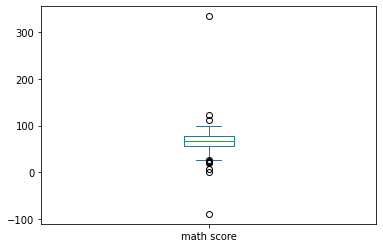

In [59]:
# Dealing with outliers
df['math score'].plot.box()

<AxesSubplot:>

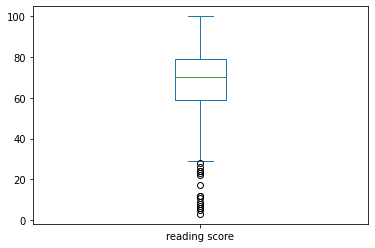

In [60]:
df['reading score'].plot.box()

<AxesSubplot:>

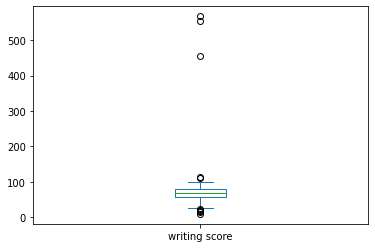

In [61]:
df['writing score'].plot.box()

In [62]:
math_IQR = df['math score'].quantile(0.75) - df['math score'].quantile(0.25)
math_diff = math_IQR * 1.5
math_min = df['math score'].quantile(0.25) - math_diff
math_max = df['math score'].quantile(0.75) + math_diff

reading_IQR = df['reading score'].quantile(0.75) - df['reading score'].quantile(0.25)
reading_diff = reading_IQR * 1.5
reading_min = df['reading score'].quantile(0.25) - reading_diff
reading_max = df['reading score'].quantile(0.75) + reading_diff

writing_IQR = df['writing score'].quantile(0.75) - df['writing score'].quantile(0.25)
writing_diff = writing_IQR * 1.5
writing_min = df['writing score'].quantile(0.25) - writing_diff
writing_max = df['writing score'].quantile(0.75) + writing_diff

df = df[(df['math score'] <= math_max) & (df['math score'] >= math_min)]
df = df[(df['reading score'] <= reading_max) & (df['reading score'] >= reading_min)]
df = df[(df['writing score'] <= writing_max) & (df['writing score'] >= writing_min)]
df.shape

(912, 8)

<AxesSubplot:>

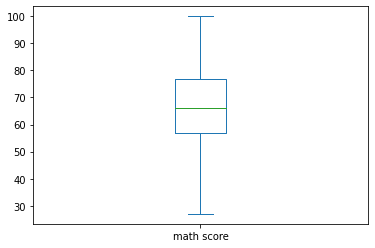

In [63]:
df['math score'].plot.box()

<AxesSubplot:>

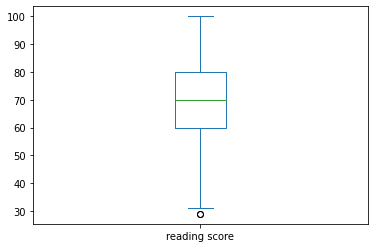

In [64]:
df['reading score'].plot.box()

<AxesSubplot:>

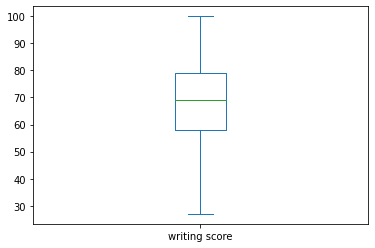

In [65]:
df['writing score'].plot.box()

In [66]:
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,0.484649,2.331140,2.899123,0.347588,0.365132,66.527412,69.559211,68.532895
std,0.500039,1.414212,1.463316,0.476466,0.481731,14.529327,14.135335,14.579846
min,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,29.000000,27.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,57.000000,60.000000,58.000000
50%,0.000000,2.000000,3.000000,0.000000,0.000000,66.000000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.000000,80.000000,79.000000
max,1.000000,5.000000,5.000000,1.000000,1.000000,100.000000,100.000000,100.000000


(array([ 11.,  32.,  56., 120., 169., 167., 158., 102.,  64.,  33.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

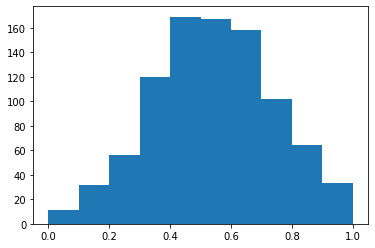

In [45]:
for column in ['math score', 'reading score', 'writing score']:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    

plt.hist(df['math score'])